In [47]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# drop the table if it exists to start fresh
cursor.execute("DROP TABLE IF EXISTS Songs;")

# create the table
cursor.execute('''
CREATE TABLE Songs (
    Song TEXT,
    Artist TEXT,
    "Peak Position" INTEGER,
    "Weeks in Charts" INTEGER,
    Category TEXT,
    Winner TEXT,
    Duration_ms INTEGER,
    Explicit TEXT,
    Popularity INTEGER
);
''')

In [48]:
# read in csv data
df = pd.read_csv('Api_kaggle_final-2.csv')
print(df.head())

                 Song                  Artist  Peak Position Weeks in Charts  \
0                 360              Charli xcx             41              11   
1  A Bar Song (Tipsy)               Shaboozey              1              19   
2               Apple              Charli xcx             51               5   
3            Big Mama                   Latto              1               -   
4    Die With A Smile  Lady Gaga & Bruno Mars              1               -   

                         Category Winner  Duration_ms  Explicit  Popularity  
0              Record of the Year     No       133805      True          82  
1   Best Country Solo Performance     No       171291      True          87  
2       Best Pop Solo Performance     No       151739     False          82  
3    Best Melodic Rap Performance     No       174000      True          58  
4  Best Pop Duo/Group Performance    Yes       251667     False         100  


In [49]:
# add the csv data to table
df.to_sql("Songs", conn, if_exists="append", index=False)

23

In [50]:
# commit the transaction
conn.commit()

# verify the data
cursor.execute("SELECT * FROM Songs;")
rows = cursor.fetchall()
for row in rows:
    print(row)

('360', 'Charli xcx', 41, 11, 'Record of the Year', 'No', 133805, '1', 82)
('A Bar Song (Tipsy)', 'Shaboozey', 1, 19, 'Best Country Solo Performance', 'No', 171291, '1', 87)
('Apple', 'Charli xcx', 51, 5, 'Best Pop Solo Performance', 'No', 151739, '0', 82)
('Big Mama', 'Latto', 1, '-', 'Best Melodic Rap Performance', 'No', 174000, '1', 58)
('Die With A Smile', 'Lady Gaga & Bruno Mars', 1, '-', 'Best Pop Duo/Group Performance', 'Yes', 251667, '0', 100)
('Enough (Miami)', 'Cardi B', 9, 14, 'Best Rap Performance', 'No', 158727, '1', 64)
('Espresso', 'Sabrina Carpenter', 3, 19, 'Record of the Year', 'No', 175459, '0', 67)
('Espresso', 'Sabrina Carpenter', 3, 19, 'Record of the Year', 'No', 175459, '0', 67)
('Espresso', 'Sabrina Carpenter', 3, 19, 'Best Pop Solo Performance', 'Yes', 175459, '0', 67)
('Espresso', 'Sabrina Carpenter', 3, 19, 'Best Pop Solo Performance', 'Yes', 175459, '0', 67)
('Houdini', 'Eminem', 2, 12, 'Best Rap Performance', 'No', 227239, '1', 80)
('I Am Not Okay', 'Jelly

In [51]:
# ingested data
cursor.execute("SELECT COUNT(*) FROM Songs;")
num_records = cursor.fetchone()[0]

# get columns by fetching one row and checking its length
cursor.execute("SELECT * FROM Songs LIMIT 1;")
first_row = cursor.fetchone()
num_columns = len(first_row) if first_row else 0

print("Summary of Ingested Data")
print(f"Number of records: {num_records}")
print(f"Number of columns: {num_columns}")
print()

Summary of Ingested Data
Number of records: 23
Number of columns: 9



In [52]:
# removes duplicates in the data
cursor.execute('''
CREATE TABLE Songs_Transformed AS
SELECT DISTINCT * FROM Songs;
''')

In [53]:
# transformed data
cursor.execute("SELECT COUNT(*) FROM Songs_Transformed;")
num_records_transformed = cursor.fetchone()[0]

# get columns in the transformed table
cursor.execute("SELECT * FROM Songs_Transformed LIMIT 1;")
first_row_transformed = cursor.fetchone()
num_columns_transformed = len(first_row_transformed) if first_row_transformed else 0

print("Summary of Transformed Data")
print(f"Number of records (after deduplication): {num_records_transformed}")
print(f"Number of columns: {num_columns_transformed}")

Summary of Transformed Data
Number of records (after deduplication): 17
Number of columns: 9


In [54]:
# load data into pandas df
query = "SELECT * FROM Songs;"
df = pd.read_sql_query(query, conn)

# close the connection
conn.close()

In [55]:
# basic analysis
print(" Basic Data Analysis")
print("\n1. First 5 rows of the dataset:")
print(df.head())

print("\n2. Number of songs by category:")
print(df['Category'].value_counts().to_string(header=False))

print("\n3. Average popularity by category:")
print(df.groupby('Category')['Popularity'].mean().to_string(header=False))

 Basic Data Analysis

1. First 5 rows of the dataset:
                 Song                  Artist  Peak Position Weeks in Charts  \
0                 360              Charli xcx             41              11   
1  A Bar Song (Tipsy)               Shaboozey              1              19   
2               Apple              Charli xcx             51               5   
3            Big Mama                   Latto              1               -   
4    Die With A Smile  Lady Gaga & Bruno Mars              1               -   

                         Category Winner  Duration_ms Explicit  Popularity  
0              Record of the Year     No       133805        1          82  
1   Best Country Solo Performance     No       171291        1          87  
2       Best Pop Solo Performance     No       151739        0          82  
3    Best Melodic Rap Performance     No       174000        1          58  
4  Best Pop Duo/Group Performance    Yes       251667        0         100  

2.

Text(0, 0.5, 'Count')

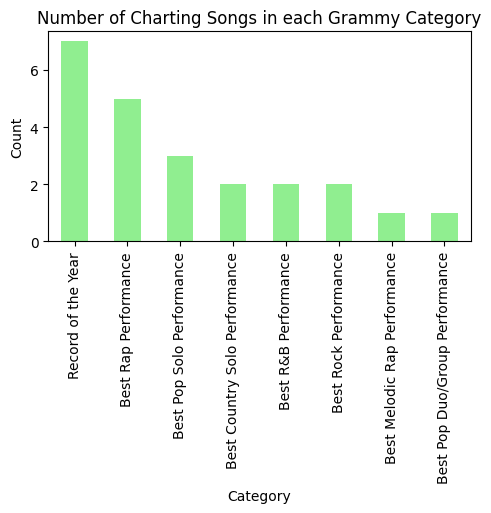

In [56]:
# data visualization
plt.figure(figsize=(12, 6))

# bar plot: number of songs by category
plt.subplot(2, 2, 1)
df['Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Charting Songs in each Grammy Category')
plt.xlabel('Category')
plt.ylabel('Count')

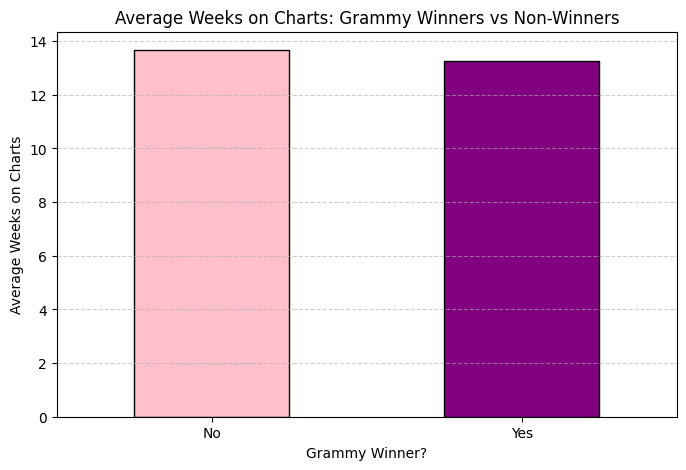

In [57]:
# bar plot: average weeks on chart by grammy winner status
df['Weeks in Charts'] = pd.to_numeric(df['Weeks in Charts'], errors='coerce') # convert to numeric, coerce errors to NaN
plt.figure(figsize=(8, 5))
df.groupby('Winner')['Weeks in Charts'].mean().plot(
    kind='bar',
    color=['pink', 'purple'],
    edgecolor='black'
)
plt.title('Average Weeks on Charts: Grammy Winners vs Non-Winners')
plt.xlabel('Grammy Winner?')
plt.ylabel('Average Weeks on Charts')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

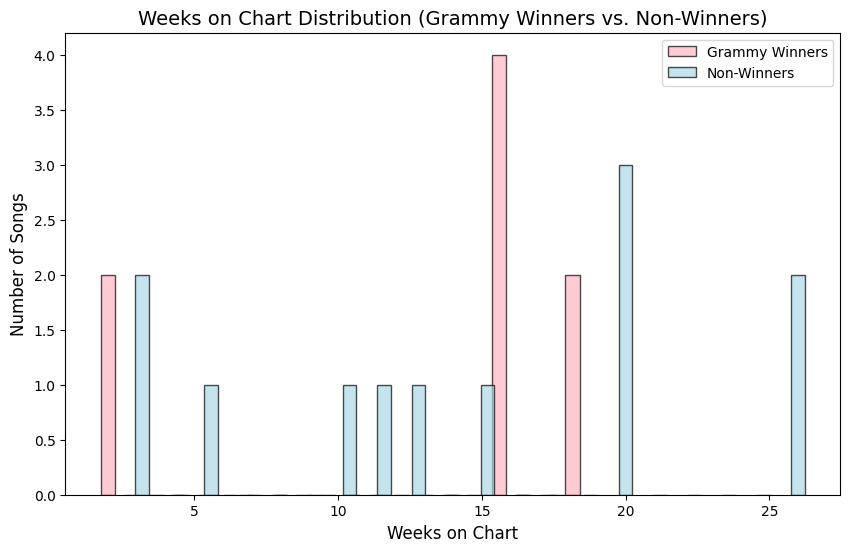

In [61]:
# histogram: weeks on chart separated by grammy win
winners = df[df["Winner"] == "Yes"]["Weeks in Charts"]
non_winners = df[df["Winner"] == "No"]["Weeks in Charts"]
plt.figure(figsize=(10, 6))
plt.hist(winners, bins=20, color="lightpink", edgecolor="black", alpha=0.7, label="Grammy Winners", rwidth=0.6, align="left")
plt.hist(non_winners, bins=20, color="lightblue", edgecolor="black", alpha=0.7, label="Non-Winners", rwidth=0.4, align="right")
plt.xlabel("Weeks on Chart", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)
plt.title("Weeks on Chart Distribution (Grammy Winners vs. Non-Winners)", fontsize=14)
plt.legend()
plt.show()